# Analyzing Data in Python

## Context

Once we have access to the dataset, we can start conducting various types of analysis on it. There are many possibilities, depending on the use case:
- Statistical Analysis:
    * Count unique values;
    * Count features of certain group;
    * Compare the mean, std, quantiles;
- Visual Analysis:
    * Bar plots;
    * Histograms;
    * Violin plots;
    * Boxplots.
    
In this notebook, we will see how to analyze a dataset in such way. In particular, we will try to answer simple questions about the dataset using bivariate and multivariate analysis.

### Import the dataset into pandas DataFrame object

In [35]:
# Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/humbertobasurto/Loan_data/master/credit_train.csv')

print(df.shape)
df.head()

(100514, 19)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [25]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [29]:
df.loc[df["Loan ID"].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.dropna(axis = 0, subset = ["Loan ID"], inplace = True)
df.loc[df["Loan ID"].isna()]

In [10]:




df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [8]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [9]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [23]:
df.duplicated("Loan ID", keep = False).sum()

36516

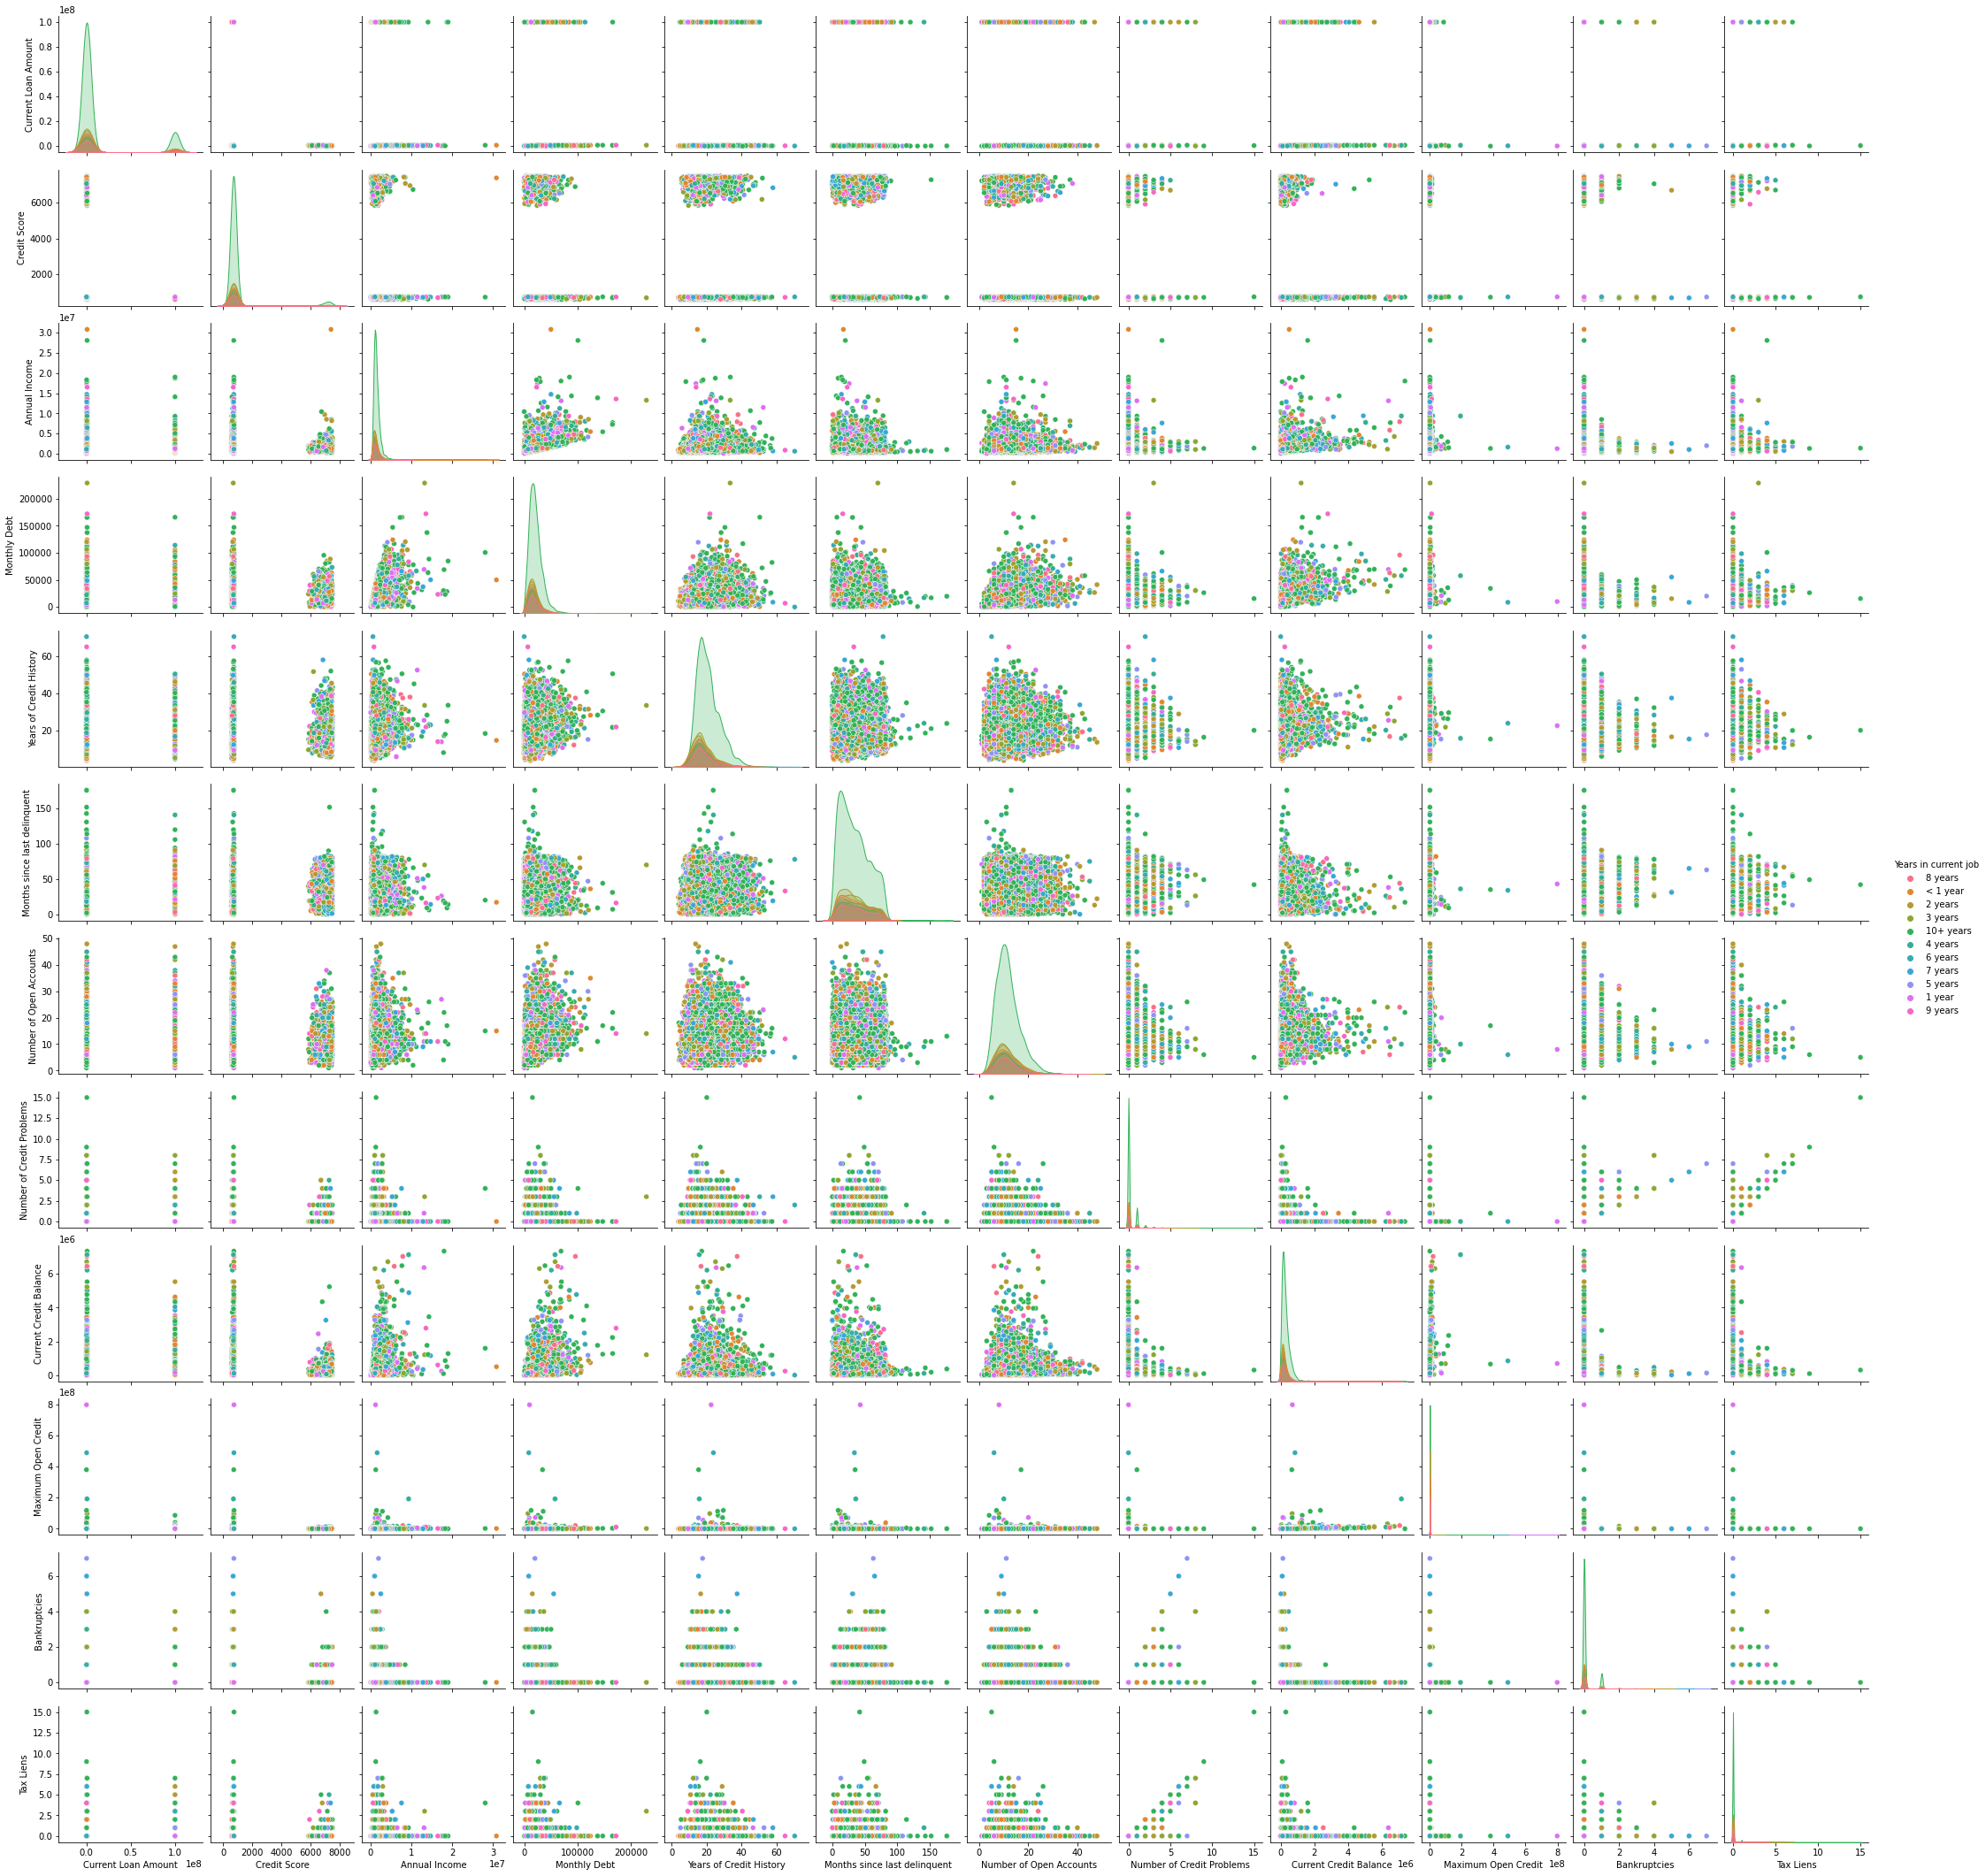

In [36]:
sns.pairplot(df.dropna(), hue = 'Years in current job')

### Analyze unique values 

In [3]:
df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

### Group customers per years in current job

In [4]:
df.groupby('Years in current job').count()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Years in current job,,,,,,,,,,,,,,,,,,
1 year,6460,6460,6460,6460,6460,5175,5175,6460,6460,6460,6460,2827,6460,6460,6460,6460,6436,6459
10+ years,31121,31121,31121,31121,31121,25327,25327,31121,31121,31121,31121,16048,31121,31121,31121,31120,31091,31120
2 years,9134,9134,9134,9134,9134,7385,7385,9134,9134,9134,9134,3968,9134,9134,9134,9133,9105,9134
3 years,8169,8169,8169,8169,8169,6618,6618,8169,8169,8169,8169,3708,8169,8169,8169,8169,8151,8169
4 years,6143,6143,6143,6143,6143,4916,4916,6143,6143,6143,6143,2835,6143,6143,6143,6143,6132,6143
5 years,6787,6787,6787,6787,6787,5474,5474,6787,6787,6787,6787,3061,6787,6787,6787,6787,6778,6787
6 years,5686,5686,5686,5686,5686,4576,4576,5686,5686,5686,5686,2611,5686,5686,5686,5686,5676,5686
7 years,5577,5577,5577,5577,5577,4509,4509,5577,5577,5577,5577,2570,5577,5577,5577,5577,5573,5576
8 years,4582,4582,4582,4582,4582,3712,3712,4582,4582,4582,4582,2083,4582,4582,4582,4582,4569,4581


In [5]:
counts = df['Years in current job'].value_counts()

<AxesSubplot:>

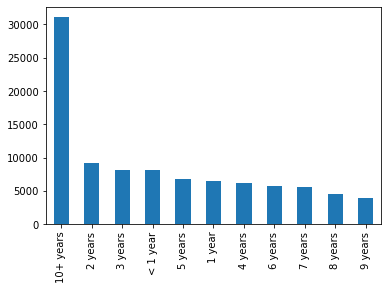

In [6]:
counts.plot.bar()

In [7]:
df['Monthly Debt'].mean()

18472.412335799687

In [11]:
df['Monthly Debt'].std()

12174.992609480236

In [12]:
df['Monthly Debt'].quantile(0.75) - df['Monthly Debt'].quantile(0.25)

13797.895

<AxesSubplot:>

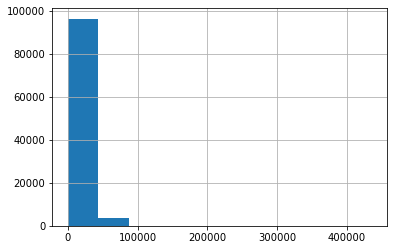

In [13]:
df['Monthly Debt'].hist(bins = 10)

In [14]:
iqd = df['Monthly Debt'].between(df['Monthly Debt'].quantile(0.10),  df['Monthly Debt'].quantile(0.90))

<AxesSubplot:>

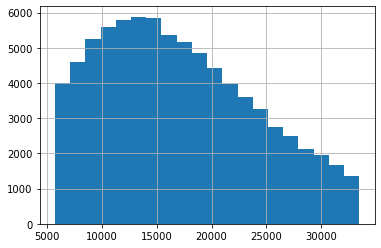

In [15]:
df['Monthly Debt'][iqd].hist(bins= 20)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

### Drop NaN values

In [17]:
df.dropna(inplace = True)

In [18]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


### Bivariate analysis

#### Violin PLot

In [32]:
plt.figure(figsize=(20, 10))
sns.violinplot( y = 'Annual Income', x = 'Home Ownership' , data = df, inner = 'box')

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='Purpose', ylabel='Monthly Debt'>

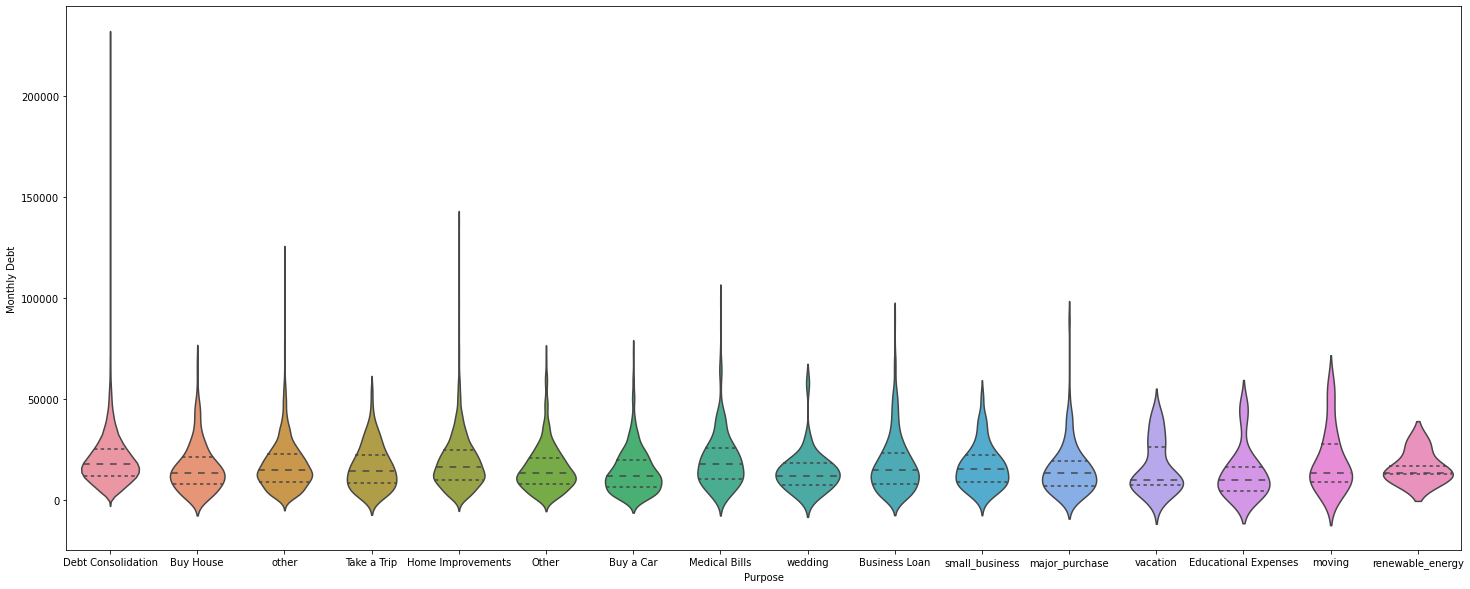

In [23]:
plt.figure(figsize=(25, 10))
sns.violinplot( y='Monthly Debt', x = 'Purpose' , data = df, inner = 'quartile')

### Multivariate analysis

Let us now try to answer the following questions:

- For what purpose do people take loans?

- Is there a distinction in the purpose of having a loan between high-income and low-income customers?

- Is the Loan payment status (Fully paid/Charged off) related to the income? Is it related to the purpose?

<AxesSubplot:xlabel='Purpose', ylabel='Annual Income'>

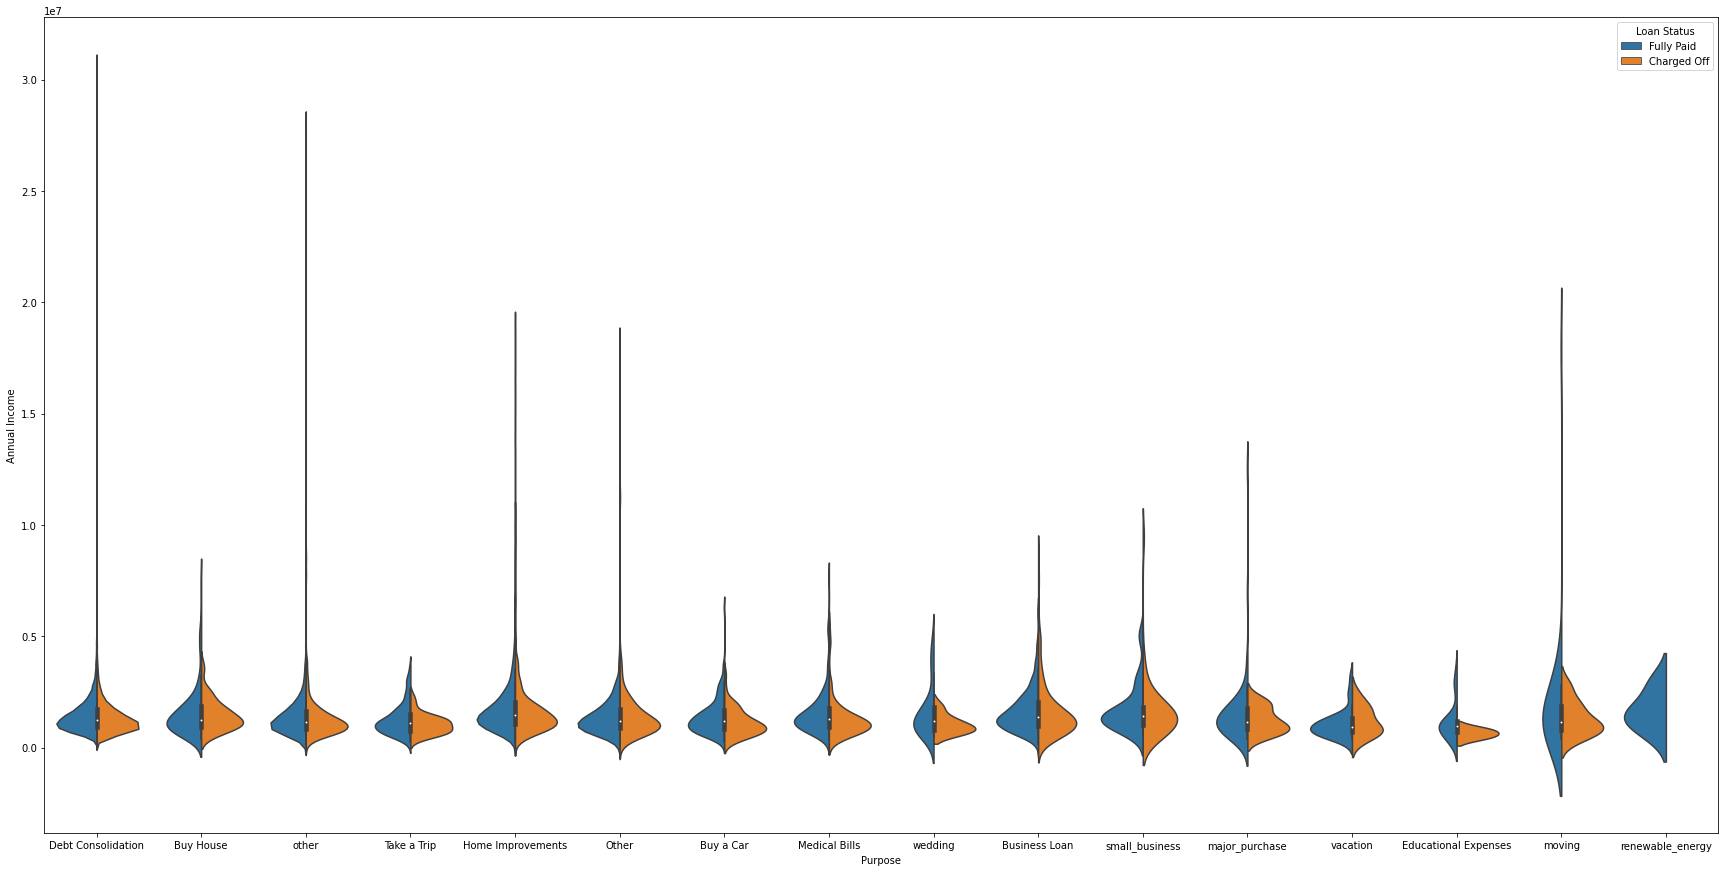

In [33]:
plt.figure(figsize=(30, 15))
sns.violinplot(y='Annual Income', x = 'Purpose', hue='Loan Status', data=df, split = True)

<AxesSubplot:xlabel='Purpose', ylabel='Annual Income'>

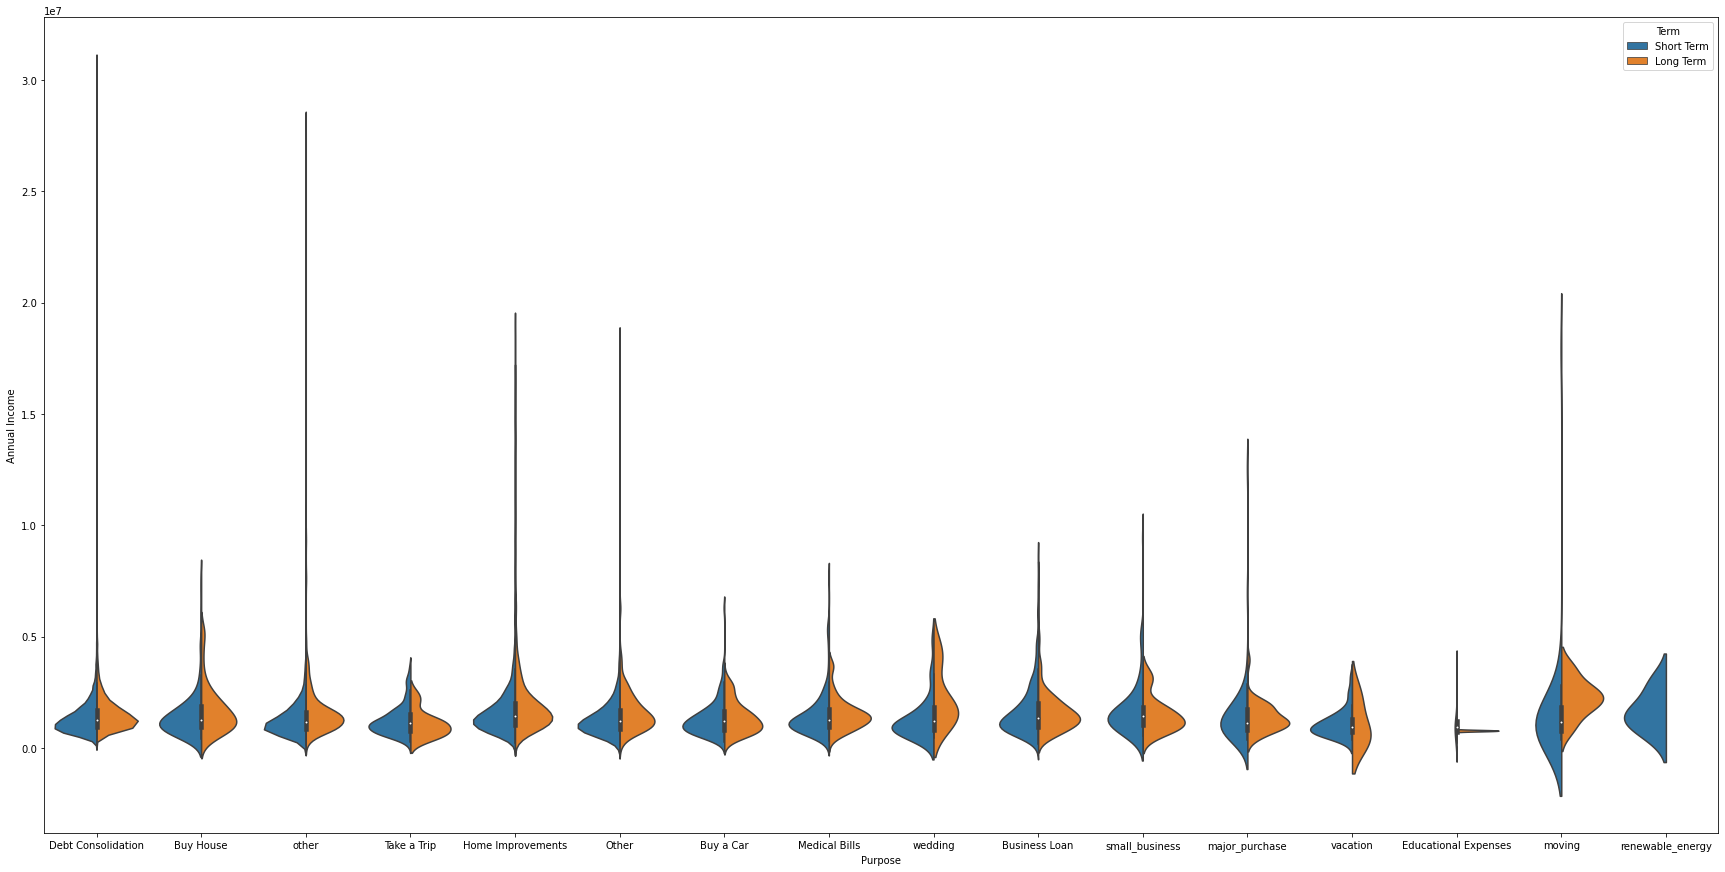

In [42]:
plt.figure(figsize=(30, 15))
sns.violinplot(y='Annual Income', x = 'Purpose', hue='Term', data=df, split = True)

Sometimes (if not always), our dataset contains NaN entries. Those values can result for different reasons: wrong encoding, missing value, unavailable value, etc. Dealing with NaN is crucial in order to conduct a meaninfgful analysis. In this notebook, we will see how to deal with such a case, and how to automate this process in the future.

In [20]:
df['Annual Income'].isna().sum()

0

# Data Science Lecture 2 - Exercice 3

## Context

The pandas table that we get once imported is not always in the right format. We might want to change the indices and/or columns, or even pivot the entire table. In this notebook, we are going to see how to do so. Afterwards, we will see how to compute an important **similarity metric** that compares the similarity amongst the DataFrame's entries. This result will be plotted on a heatmap and discussed as well.

In [12]:
import pandas as pd

data = pd.read_csv('sample_data/ratings_small.csv')

data.drop('timestamp', axis=1,inplace= True)
df = pd.DataFrame(data)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/ratings_small.csv'

Bring the data in the desired form. Every row should correspond to a user and every column to a movie.

In [ ]:
ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix.head(5)

We have a lot of NULL values because each user hasn't rated all the movies. Therefore, replace the NaN values with -1.

In [ ]:
ratings_matrix.fillna(-1, inplace = True)
ratings_matrix.head(8)

Import the function which computes the cosine similarity from the sklearn library

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:

$K(X, Y) = \frac{ <X, Y> } { ||X||*||Y|| }$

In [ ]:
# if Y=None, the output will be the pairwise similarities between all samples in X.
cos_similarity_matrix = cosine_similarity(X=ratings_matrix, Y=None, dense_output=True)
cos_similarity_matrix

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (15,15))
plt.title('Cosine similarity matrix of movie reviews')
sns.heatmap(cos_similarity_matrix)
plt.show

In [ ]:
cos(w)=0 => w=90 or w=270 -> low similarity
cos(w)=1 => w=0 -> identical

Therefore, in the above heatmap:
- the lighter the colour , the higher the similarity;
- the darker the colour, the lower the similarity.